In [1]:
# Import the packages we will use
import matplotlib.pyplot as plt
import numpy as np
import pandas
import h5py

import cooler

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# The following directive activates inline plotting
%matplotlib inline

In [3]:
# Download a multiresoltion Dictyostelium file
!wget -nc http://makarich.fbb.msu.ru/agalicina/Lab_open/DICTY/COOL/Dicty_0A.1000.cool.multires

Файл «Dicty_0A.1000.cool.multires» уже существует — не загружается.



In [4]:
h5 = h5py.File('Dicty_0A.1000.cool.multires', 'r')

In [5]:
list(h5.keys())

['resolutions']

In [6]:
list(h5['resolutions'])

['1000',
 '10000',
 '100000',
 '1000000',
 '2000',
 '20000',
 '3000',
 '30000',
 '4000',
 '5000',
 '50000']

In [7]:
list(h5['resolutions']['1000']['pixels'].keys())

['bin1_id', 'bin2_id', 'count']

## Cooler

In [8]:
filepath = 'Dicty_0A.1000.cool.multires::resolutions/1000'

In [9]:
c = cooler.Cooler(filepath)

In [10]:
c.info

{'bin-size': 1000,
 'bin-type': 'fixed',
 'creation-date': '2018-04-27T21:04:23.797507',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/mirnylab/cooler',
 'format-version': 2,
 'generated-by': 'cooler-0.7.8',
 'genome-assembly': 'dicty',
 'metadata': {},
 'nbins': 33947,
 'nchroms': 6,
 'nnz': 10494614,
 'sum': 21807437}

In [11]:
c.chroms()

In [12]:
c.chroms()[:]

,name,length
0,chr1,4923596
1,chr2,8484197
2,chr3,6357299
3,chr4,5450249
4,chr5,5125352
5,chr6,3602379


In [13]:
c.shape

(33947, 33947)

In [14]:
mat = c.matrix(balance=False, sparse=True)[:2000,:2000]

In [15]:
arr = mat.toarray()
arr

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 18, 11, 16],
       [ 0,  0,  0, ..., 11,  1,  4],
       [ 0,  0,  0, ..., 16,  4,  2]], dtype=int32)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


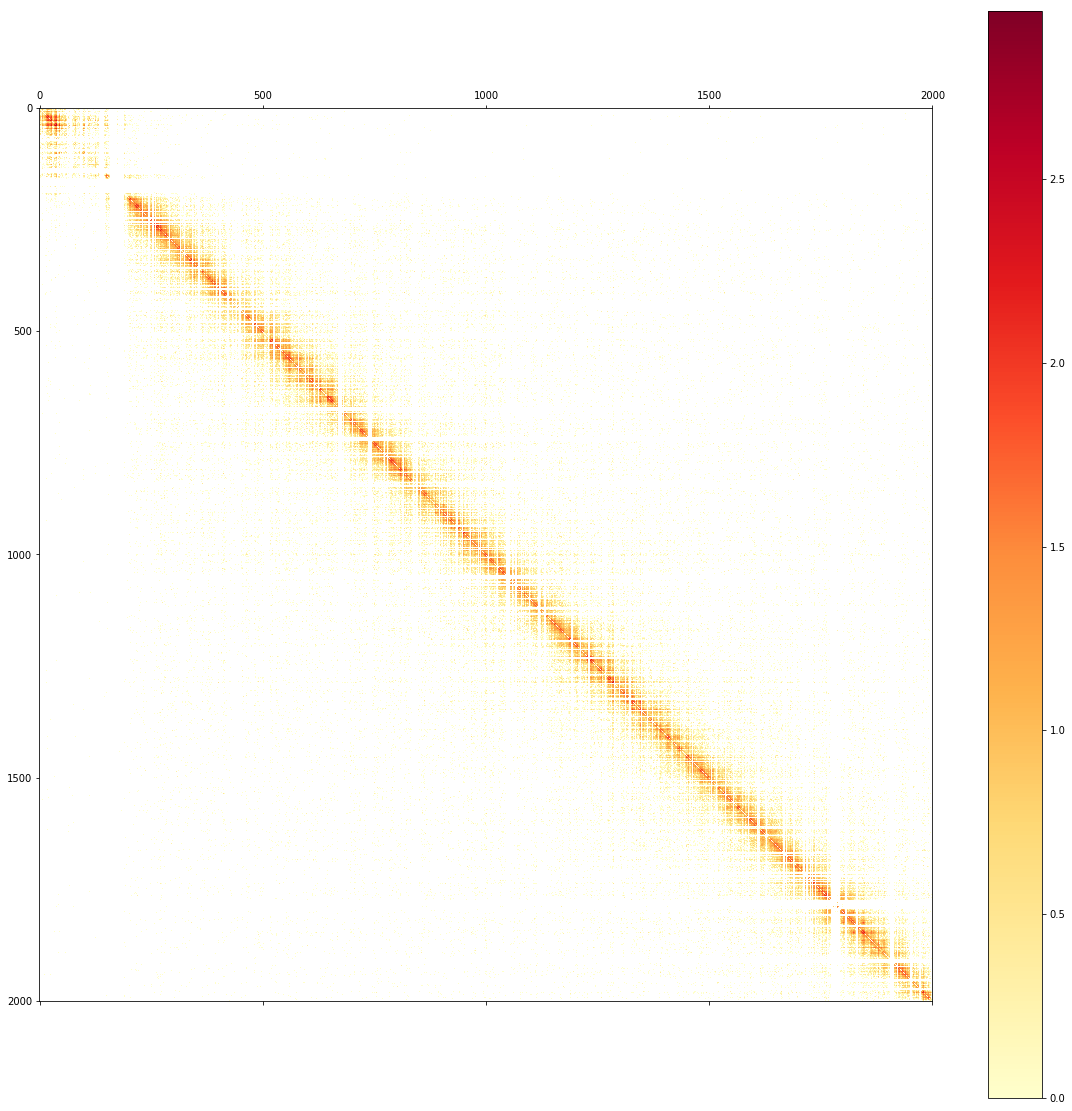

In [16]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(arr), cmap='YlOrRd')
fig.colorbar(im)